In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt

from dataset import ImageNette


means = torch.tensor([0.485, 0.456, 0.406])
stds = torch.tensor([0.229, 0.224, 0.225])
batch_size = 4

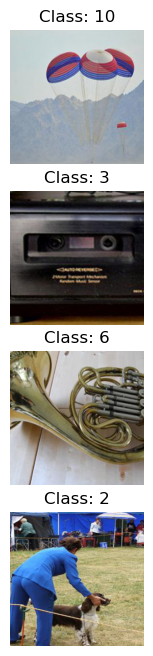

In [2]:
dataset = ImageNette(split="train", size=256, download=False)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
imgs, labels = next(iter(dataloader))

fig, axes = plt.subplots(nrows=batch_size, ncols=1, figsize=(batch_size * 8, 8))
for i in range(batch_size):
    img = imgs[i]
    img = TF.normalize(img, mean=0., std=1 / stds)
    img = TF.normalize(img, mean=-means, std=1.)
    img = TF.to_pil_image(img)
    axes[i].imshow(img)
    axes[i].set_axis_off()
    axes[i].set_title(f"Class: {labels[i].item()}")